# Jegyzőkönyv 8 számolások

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import schemdraw
from schemdraw import logic
from schemdraw.parsing import logicparse
from sympy import symbols, Not, Or, And
from sympy.logic.boolalg import simplify_logic
from tabulate import tabulate

C:\Users\Kornel\AppData\Local\Temp\ipykernel_16148\803247968.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def logic_form_print(formula) -> None:
    print(str(formula).upper().replace("|", "∪").replace("&", "∩").replace(" ", ""))

## 1. feladat: ADC

A feladat egy Analóg Digitál (C)konverter készítése.

### A
#### Áramkör

[![Áramkör](./jegyzokonyv08/feladat1a.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgDOB0YzCsICMZICYaoOyYMxgByoBsAnCZiHBAgCw6UCmAtIogFABKIOqSmR3XolT5wYmtTEQUcNgA8QqBK1F0kqRCBpIBAJwYAzNrpAkBw0WaQleEdDDYB3QXwE9rt46fM2dERL7+sF6IRP6+qKjaAbZIwSaR0RH4ojFiyA4m7mlWaUGZfuqpYR5i9mBeiUWKUaV28Yop1SKpgYrBzlYt3nVOro2p-IoS4H2IQ1H+JZOjzqF2I-O9zlVpVTMVK7UzSgIbfbvDdnB7TZs6iicgRNqH5zeX5jS3V+eIz481LwLn61frZzGH2672+s2utyaDzubFCvHwEBwRFECK0oUUIAAJoYAIYAVwANgAXJgEhiYpBSKBgdhwwpI4oQGjo3jYgz44mk8mU6TU2lEXgzBlHNF7LG4wkkskUzS8lA0tgAcxFzL2IzosQqyqWqsKGqkSpAqN1xvc0k4F0OTHcd3E-kgojlkFkCiYIxmTDV9GiAgAlgA7AAOeKJhpwSKQH3D5hK5pWTQsX2qv1qiaWibeJUTuRE4Ojke0+YzfVRODg8MRyPBSzLQhKwt+I1rIobbBxRrsTVL5aNlHSsFgimd7yIARSeAkJDL5gdcQHbcKIPrPdECHyA6QaHwRDgNHIYH4YFQ4anm9SA4q7Z2TSFK7768HKEwNMwu5w+DgZj3wmUs4yHQGaoi1zCp324CAADFZTEBAWBAAA1AB7YkcUVBg2CAA)

### B
#### Áramkör

[![Áramkör](./jegyzokonyv08/feladat1b.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgDOB0YzCsICMZICYaoOyYMxgByoBsAnCZiHBAgCw6UCmAtIogFABKIOqSmR3XolT5wYmtTEQUcNgA8QqBK1F0kqRCBpIBAJwYAzNrpAkBw0WaQleEdDDYB3QXwE9rt46fM2dERL7+sF6IRP6+qKjaAbZIwSaR0RH4ojFiyA4m7mlWaUGZfuqpYR5i9mBeiUWKUaV28Yop1SKpgYrBzlYt3nVOro2p-IoS4H2IQ1H+JZOjzqF2I-O9zlVpVTMVK7UzSgIbfbvDdnB7TZs6iicgRNqH5zeX5jS3V+eIz481LwLn61frZzGH2672+s2utyaDzunAuhyY7ju4kk0igsgUTBGMyYezU0QEAEsAHYABwArgAXNgAc24OCe2hw9MK0gOTQsX2qv1qHKWHLeJQ5uRE4KZDLp5hFFQAhiB8HYmvLuHBeKIEPlYHZIHB3kQAik8BISDgrspNTLCiCSibVZR0ub-Gh8EQ4DRyGB+GBUEzjXaMsFZTsmjMbXK7RrYFBMGBxq6cPg4GY3cIEGbNWzUiKxVy2Ig4BQ3eLXdEPhAKKyAhQeBBDcreLWaH1nqorERaoXwW3tB2u4pMJ5nM2tA9E7waA9zqPh9op1gB1oaKp3CcIHR5yutMvpv3wUOJKurPvd4eYFouiNzkP6aoldfd7eiDf6qJL0r0C29gRd4uJdPf5eHmzcdoiGACQIEDtxh+Jtcg+IdQW-VI4J-WtzlvfBtFvFVwSWUNcMfcEQ2wkMCIqABCEAABNDGlMkABsKTEABBMAABomMQdjeAAIVQVjuM47iIAABV0AkAHsxIpABPAAdABnaiAGNxOokwAH51MQWSAEcMlkoktLAXSY2Mol9J0mBtMMzSTJgAy2HfUojyqI8IGogxaIY8NCKaFymmzX4AuZat-z6UK71rO9ziigiG3cGKwG7RE-ISjM-1C4DRXQDKcrcsZfCPNJooK+sCJIl9Ss3IQSjXHDauya1SL6dDMNXCcWvapIxw6+NhhAAAxTRUQQFgQAANXEhjpWpBg2CAA)

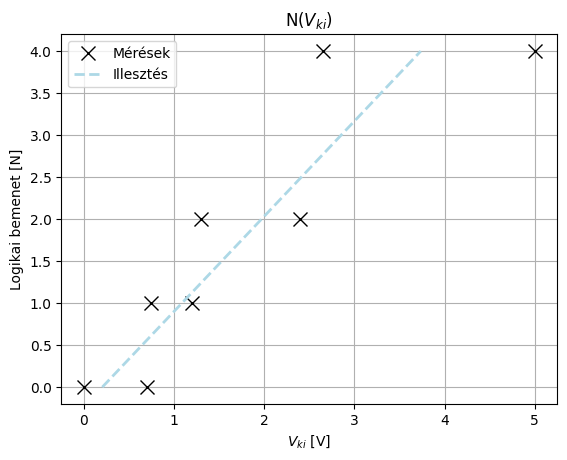

  #	  Bemenet [V]	  Kimenet [N]
  0	       0.0004	            0
  1	       0.7   	            0
  2	       0.75  	            1
  3	       1.2   	            1
  4	       1.3   	            2
  5	       2.4   	            2
  6	       2.65  	            4
  7	       5     	            4


In [11]:
from scipy.stats import linregress

V_be = pd.array(
    [
        400 * 10 ** -6,
        700 * 10 ** -3,
        750 * 10 ** -3,
        1200 * 10 ** -3,
        1300 * 10 ** -3,
        2400 * 10 ** -3,
        2650 * 10 ** -3,
        5000 * 10 ** -3,
    ]
)

N_ki = pd.array([0, 0, 1, 1, 2, 2, 4, 4])

fit = linregress(N_ki, V_be)
fit_y = fit.slope * N_ki + fit.intercept

# plot v_ki by v_be
plt.plot(V_be, N_ki, "x", color="black", markersize=10, label="Mérések")
plt.plot(fit_y, N_ki, "--", color="lightblue", linewidth=2, label="Illesztés")
plt.title("N($V_{ki}$)")
plt.xlabel("$V_{ki}$ [V]")
plt.ylabel("Logikai bemenet [N]")
plt.legend()
plt.grid()
plt.show()

# create table and show it
table = pd.DataFrame({"v_be": V_be, "N_ki": N_ki})
print(tabulate(table, ["#", "Bemenet [V]", "Kimenet [N]"], tablefmt="tsv"))

## 2. feladat: Programozható frekvenciaosztó


### Áramkör

[![Áramkör](./jegyzokonyv08/feladat2.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgDOB0YzCMBWAbAJgSAzADhZA7KgjnACwYCc5YSJICE6ZdApgLRxwBQAMiKzZjC1W5JINoQIAMwCGAGwDOzOuB58BGDGJFjNYySFmLl6MGv60tWPqMxJrBo0pVneFkCRg2xng9PnOppwASnwoKLQoeChh0SBRMRAxKLBJkOi4plAInCQocOqRcXBiCeAe5QwuIXxwKNZkMexIEI2VHlV+6ZwA7rX1HhhNWK1Dqn3uJAKsIx4CZhOzbZNjC3xLYzOt873r28KzCHXje3THJNZHibsXZzG3UxI3DRr3O31jbQ+rz4MxAm01mMyhxknE1qD4sVzj8AJIgWxtAGrbJ0XaQtqIn4lYThIpNOAEKGJTDlLJOZQQ44glrEk4lJJxNClcGcABO8WQmAQyS5ZQgcFg7M5PmBXIwPPKgpgnHyBWZ3JicHIMQlJIwIBGXi4E0hZXc-N27GOGCEtWprN1A1NwkhNtUQA)